In [1]:
import grafiti as gf
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import collections
import scanpy as sc
import pandas

import warnings
warnings.filterwarnings('ignore')

model_path = "spectrum_model"
annotated_output = "spectrum_sappy.h5ad"
fov_key = "spectrum_fov_id"
target_key = "status_plus"
retrain = True

/Users/ceglian/miniforge3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read("/Users/ceglian/GitHub/sapp2/notebooks/datasets/SPECTRUM_squidpy.h5ad")

In [3]:
status_plus = ["{}_{}".format(x,y) for x,y in zip(adata.obs["consensus_signature"],adata.obs["wgd_status"])]
adata.obs["status_plus"] = status_plus

adata = adata[adata.obs["status_plus"].isin(["HRD-Dup_Non-WGD","HRD-Dup_WGD"])]
adata = adata[adata.obs["tumor_supersite"].isin(["Adnexa"])]

df = adata.obs
for x in set(adata.obs["tumor_supersite"]):
    dfx = df[df["tumor_supersite"] == x]
    print(x, len(set(dfx["spectrum_fov_id"])))


set(adata.obs["status_plus"])

Adnexa 228


{'HRD-Dup_Non-WGD', 'HRD-Dup_WGD'}

In [6]:
import cellcharter as cc
cc.gr.remove_long_links(adata)

 captum (see https://github.com/pytorch/captum).


In [8]:
gae = gf.ml.GAE(adata,layers=[50,50], lr=0.05, exponent=2,distance_scale=10)# if not retrain:
#     gae.load(model_path)

Generating PyTorch Geometric Dataset...
Setting up Model...
Ready to train!


In [10]:
gae.train(220, update_interval=1, threshold=1e-3)

Epoch 0 ** iteration 0 ** Loss: 36727.53125
Epoch 1 ** iteration 1 ** Loss: 34180.5
Epoch 2 ** iteration 2 ** Loss: 31753.23046875
Epoch 3 ** iteration 3 ** Loss: 29477.138671875
Epoch 4 ** iteration 4 ** Loss: 27355.134765625
Epoch 5 ** iteration 5 ** Loss: 25378.857421875
Epoch 6 ** iteration 6 ** Loss: 23535.404296875
Epoch 7 ** iteration 7 ** Loss: 21806.837890625
Epoch 8 ** iteration 8 ** Loss: 20166.310546875
Epoch 9 ** iteration 9 ** Loss: 18563.580078125
Epoch 10 ** iteration 10 ** Loss: 16909.802734375
Epoch 11 ** iteration 11 ** Loss: 15127.845703125
Epoch 12 ** iteration 12 ** Loss: 13214.3193359375
Epoch 13 ** iteration 13 ** Loss: 11272.208984375
Epoch 14 ** iteration 14 ** Loss: 9408.7587890625
Epoch 15 ** iteration 15 ** Loss: 7628.7255859375
Epoch 16 ** iteration 16 ** Loss: 5819.38134765625
Epoch 17 ** iteration 17 ** Loss: 3822.378173828125
Epoch 18 ** iteration 18 ** Loss: 1827.72216796875
Epoch 19 ** iteration 19 ** Loss: 564.2723388671875
Epoch 20 ** iteration 20 *

In [11]:
gae.load_embedding(adata)
adata.write("spectrum.h5ad")

In [12]:
gf.tl.umap(adata)
adata.write("spectrum.h5ad")

In [ ]:
from sklearn.mixture import GaussianMixture
def find_motifs_gmm(adata, cluster_key='grafiti_motif', prefix="GrafitiMotif", embedding_key="X_grafiti",k=10,max_iter=10):
    gm = GaussianMixture(n_components=k, random_state=0, max_iter=max_iter,verbose=True).fit(adata.obsm[embedding_key])
    adata.obs[cluster_key] = ["{}{}".format(prefix,x) for x in gm.predict(adata.obsm[embedding_key]).tolist()]
    return gm
gm = find_motifs_gmm(adata,k=15)
adata.write("spectrum.h5ad")

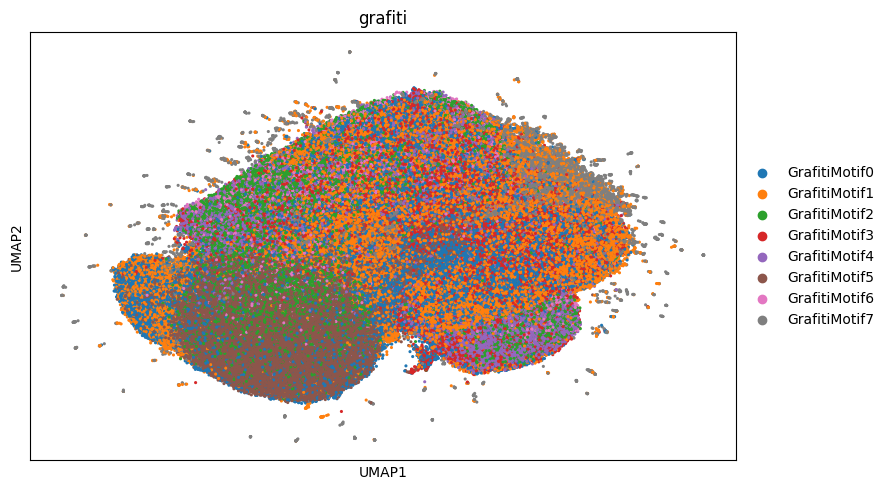

In [30]:
# gf.pl.umap(adata)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


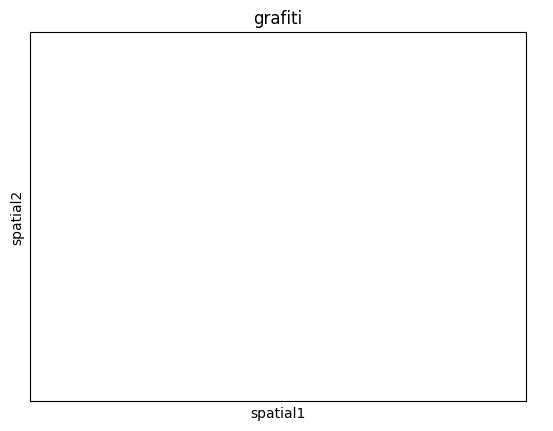

In [41]:
adata = adata[adata.obs["spectrum_fov_id"] == valid[0]]
adata.obs["X"] = adata.obsm["spatial"].T[0]
adata.obs["Y"] = adata.obsm["spatial"].T[1]
sc.pl.embedding(adata,basis="spatial",color="grafiti",s=30, alpha=0.8)

In [32]:
valid

['SPECTRUM-OV-007_S1_RIGHT_FALLOPIAN_TUBE_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[46818,10938]',
 'SPECTRUM-OV-007_S1_RIGHT_FALLOPIAN_TUBE_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[48310,16681]',
 'SPECTRUM-OV-007_S1_RIGHT_FALLOPIAN_TUBE_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[46768,16022]',
 'SPECTRUM-OV-009_S1_LEFT_OVARY_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[42781,11487]',
 'SPECTRUM-OV-022_S1_LEFT_OVARY_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[53774,12325]',
 'SPECTRUM-OV-050_S1_RIGHT_OVARY_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[57680,8866]',
 'SPECTRUM-OV-009_S1_RIGHT_OVARY_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[45598,12732]',
 'SPECTRUM-OV-050_S1_RIGHT_OVARY_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[47624,9685]',
 'SPECTRUM-OV-022_S1_RIGHT_ADNEXA_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[45281,12821]',
 'SPECTRUM-OV-009_S1_LEFT_OVARY_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[43485,13097]',
 'SPECTRUM-OV-009_S1_RIGHT_OVARY_CD68_TOX_PD1_PDL1_CD8_pa